Assignment 7: Neural Networks using Keras and Tensorflow Please see the associated document for questions

If you have problems with Keras and Tensorflow on your local installation please make sure they are updated. On Google Colab this notebook runs.

In [36]:
# imports
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [37]:
# Hyper-parameters data-loading and formatting

batch_size = 128
num_classes = 10
epochs = 10

img_rows, img_cols = 28, 28

(x_train, lbl_train), (x_test, lbl_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

**Preprocessing**

In [38]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

y_train = keras.utils.np_utils.to_categorical(lbl_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(lbl_test, num_classes)


In [39]:

## Define model ##
model = Sequential()

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=tf.keras.optimizers.SGD(lr = 0.1),
        metrics=['accuracy'],)

fit_info = model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=1,
           validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

Epoch 1/10


C:\Users\Malte Carlstedt\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


469/469 [==============================] - 2s 3ms/step - loss: 0.4843 - accuracy: 0.8613 - val_loss: 0.2776 - val_accuracy: 0.9169
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2342 - accuracy: 0.9309 - val_loss: 0.1966 - val_accuracy: 0.9421
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1787 - accuracy: 0.9475 - val_loss: 0.1698 - val_accuracy: 0.9520
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1449 - accuracy: 0.9574 - val_loss: 0.1646 - val_accuracy: 0.9500
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1222 - accuracy: 0.9644 - val_loss: 0.1280 - val_accuracy: 0.9629
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1054 - accuracy: 0.9689 - val_loss: 0.1172 - val_accuracy: 0.9649
Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0933 - accuracy: 0.9725 - val_loss: 0.1007 - val_accuracy: 0.9702
Epoch 8/10
469/46

### Plotting the accuracy of 10 epochs

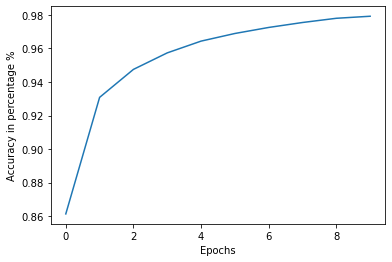

In [45]:
x = np.arange(epochs)
y = np.array(fit_info.history["accuracy"])

plt.ylabel("Accuracy in percentage %")
plt.xlabel("Epochs")
plt.plot(x,y)
plt.show()

### Plotting the validation accuracy of 10 epochs

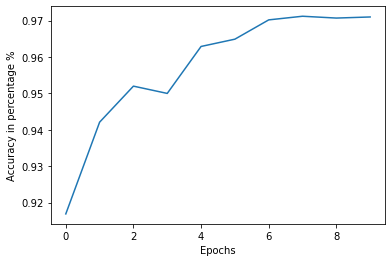

In [46]:
x = np.arange(epochs)
y = np.array(fit_info.history["val_accuracy"])

plt.ylabel("Accuracy in percentage %")
plt.xlabel("Epochs")
plt.plot(x,y)
plt.show()

### Question 4) Auto-Encoder for denoising


In [ ]:
import numpy as np
def salt_and_pepper(input, noise_level=0.5):
    """
    This applies salt and pepper noise to the input tensor - randomly setting bits to 1 or 0.
    Parameters
    ----------
    input : tensor
        The tensor to apply salt and pepper noise to.
    noise_level : float
        The amount of salt and pepper noise to add.
    Returns
    -------
    tensor
        Tensor with salt and pepper noise applied.
    """
    # salt and pepper noise
    a = np.random.binomial(size=input.shape, n=1, p=(1 - noise_level))
    b = np.random.binomial(size=input.shape, n=1, p=0.5)
    c = (a==0) * b
    return input * a + c


#data preparation
flattened_x_train = x_train.reshape(-1,784)
flattened_x_train_seasoned = salt_and_pepper(flattened_x_train, noise_level=0.4)

flattened_x_test = x_test.reshape(-1,784)
flattened_x_test_seasoneed = salt_and_pepper(flattened_x_test, noise_level=0.4)


In [ ]:

latent_dim = 96  

input_image = keras.Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_image)
encoded = Dense(latent_dim, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = keras.Model(input_image, decoded)
encoder_only = keras.Model(input_image, encoded)

encoded_input = keras.Input(shape=(latent_dim,))
decoder_layer = Sequential(autoencoder.layers[-2:])
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
fit_info_AE = autoencoder.fit(flattened_x_train_seasoned, flattened_x_train,
                epochs=32,
                batch_size=64,
                shuffle=True,
                validation_data=(flattened_x_test_seasoneed, flattened_x_test))
